In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from fbprophet import Prophet
import pmdarima as pm


Importing plotly failed. Interactive plots will not work.


Pulling in Data from KU_Pandas_for_database for a trial run of the Machine Learning Model

In [2]:
import yfinance as yf
df_kellog = yf.download('K', start='2019-01-01', end='2022-01-01', progress=False)

df_kellog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,56.779999,57.099998,56.110001,56.639999,49.821884,2245900
2019-01-03,56.549999,57.099998,56.279999,56.740002,49.909847,1689300
2019-01-04,56.820000,57.610001,56.669998,57.299999,50.402431,1897000
2019-01-07,57.080002,57.759998,56.759998,57.570000,50.639935,1930100
2019-01-08,57.549999,58.000000,57.230000,57.889999,50.921413,2168100


In [3]:
df_sp = yf.download('^GSPC', start='2019-01-01', end='2022-01-01', progress=False)

Plotting Closing Price to visualize 

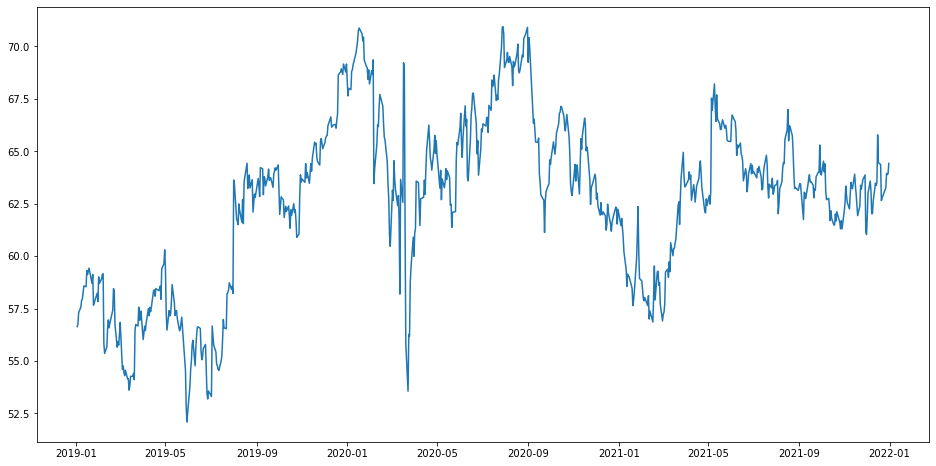

In [4]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_kellog['Close'], label='Close Price History')

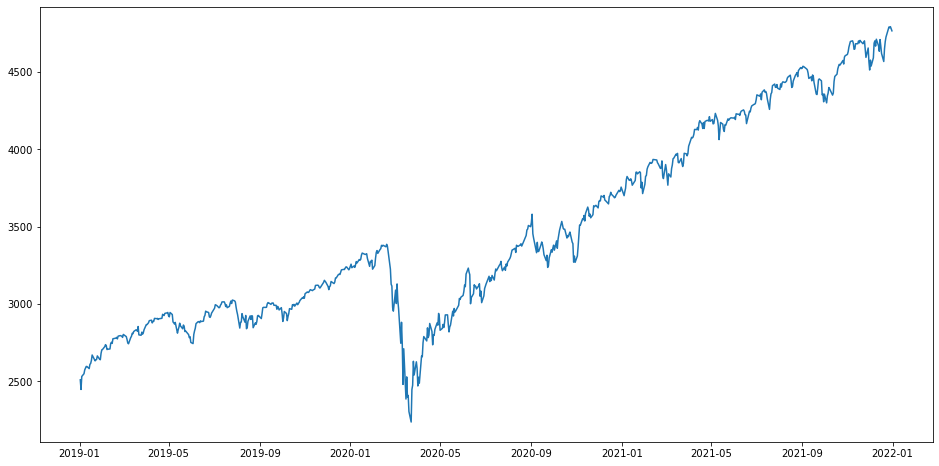

In [5]:
plt.figure(figsize=(16,8))
plt.plot(df_sp['Close'], label='Close Price History')

Looking at the Distribution of the Dataset

<AxesSubplot:ylabel='Density'>

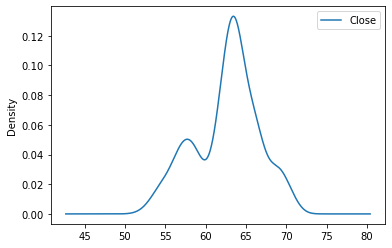

In [6]:
df_kellog_close = df_kellog[['Close']]
df_kellog_close.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

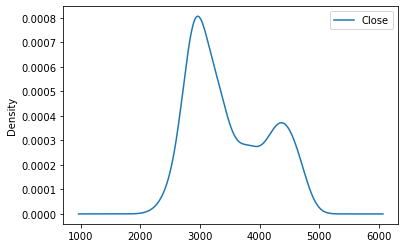

In [7]:
df_sp_close = df_sp[['Close']]
df_sp_close.plot(kind='kde')

Splitting Data into Train and Test DataSet into 80% Training Data and 20% Testing Data

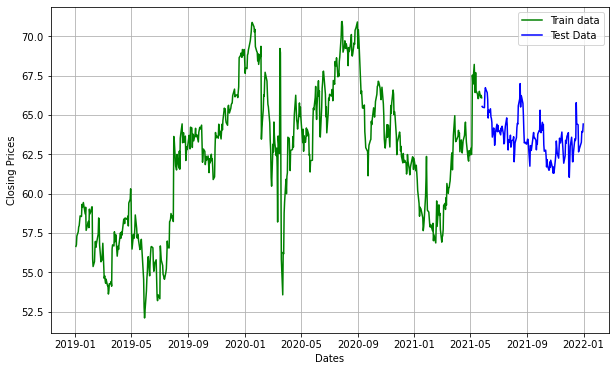

In [8]:
kellog_train_data= df_kellog_close.iloc[:int(df_kellog_close.shape[0]*0.8)]
kellog_test_data = df_kellog_close.iloc[int(df_kellog_close.shape[0]*0.80):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(kellog_train_data, 'Green', label='Train data')
plt.plot(kellog_test_data, 'blue',  label='Test Data')
plt.legend()

This Machine Learning Model will run a linear regression, ARIMA model, and a Facebook Prophet model
- limitations of these models will be they do not take into account current world situations (like COVID impacts on economy)

Linear Regression Model

In [9]:
df_linear_kellog = pd.merge(df_kellog_close, df_sp_close, on='Date')
df_linear_kellog = df_linear_kellog.rename(columns={'Close_x': 'Kellog Close', 'Close_y':'S&P Close'})

In [10]:
# for linear regression model we need an x_train value, and a y_train value
X_train, X_test, y_train, y_test = train_test_split(df_linear_kellog[['Kellog Close']], df_linear_kellog[['S&P Close']], test_size=.2)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = linear_regression_model.predict(X_test)

In [12]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [13]:
print('Mean Absolute Error:', mae)
print('Coefficient of Determination:', r2)
print('Mean Squared Error:', mse)

Mean Absolute Error: 562.4082934535934
Coefficient of Determination: 0.03369400308408954
Mean Squared Error: 400634.8755082894


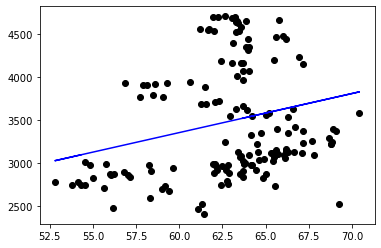

In [14]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue')
plt.show()

Arima Model

In [15]:
# ARIMA Model
arima_model = pm.auto_arima(kellog_train_data, d=1, seasonal=False, stepwise=True, suppress_warnings=True, error_action='ignore', max_p=6, max_order=None , trace=True)

arima_model.fit(kellog_train_data)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1737.611, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1757.758, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1759.758, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1759.758, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1755.896, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1746.302, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1744.560, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1734.588, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1733.666, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1747.086, Time=0.07 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1734.155, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1761.506, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1734.560, Time=0.09 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1733.498, Time=0.33 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=1732.908, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1732.476, Time=0.12 sec


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,1,2)(0,0,0)[0]             : AIC=1733.828, Time=0.25 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=1733.828, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1732.007, Time=0.09 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=1734.704, Time=0.21 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1734.298, Time=0.17 sec
 ARIMA(5,1,3)(0,0,0)[0]             : AIC=1735.695, Time=0.49 sec

Best model:  ARIMA(4,1,2)(0,0,0)[0]          
Total fit time: 6.219 seconds


ARIMA(order=(4, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [16]:
arima_y_pred = kellog_test_data.copy()

# Forecasting the Data
prediction_arima = arima_model.predict(len(kellog_test_data))
arima_y_pred["ARIMA Model Prediction"]=prediction_arima

In [17]:
r2_arima = r2_score(arima_y_pred["Close"], arima_y_pred["ARIMA Model Prediction"])
mae_arima = mean_absolute_error(arima_y_pred["Close"], arima_y_pred["ARIMA Model Prediction"])
mse_arima = mean_squared_error(arima_y_pred['Close'], arima_y_pred["ARIMA Model Prediction"])

print('Mean Absolute Error for ARIMA Model:', mae_arima)
print('Coefficient of Determination for ARIMA Model:', r2_arima)
print('Mean Squared Error for ARIMA Model:', mse_arima)

Mean Absolute Error for ARIMA Model: 2.6111991272160715
Coefficient of Determination for ARIMA Model: -4.3581521171359485
Mean Squared Error for ARIMA Model: 8.186152530753859


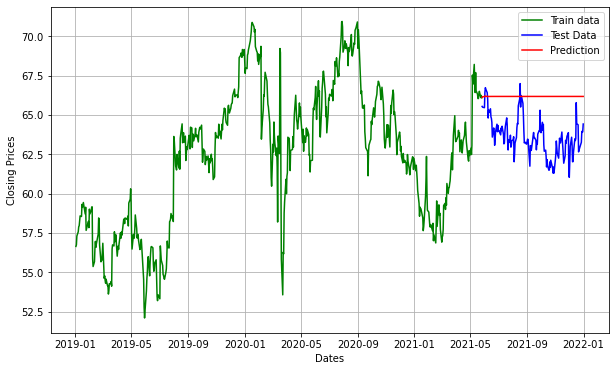

In [18]:
#plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(kellog_train_data, 'Green', label='Train data')
plt.plot(kellog_test_data, 'blue',  label='Test Data')
plt.plot(arima_y_pred["ARIMA Model Prediction"], 'Red', label='Prediction')
plt.legend()


Facebook Prophet Model with Plot of Actual vs Predictions

In [19]:
# Facebook Prophet Model
prophet_data = df_kellog_close.copy()
prophet_data = prophet_data.reset_index()

#preparing data
prophet_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
prophet_train = prophet_data[:int(prophet_data.shape[0]*0.80)]
prophet_test = prophet_data[int(prophet_data.shape[0]*0.80):]

#fit the model
prophet_model = Prophet()
prophet_model.fit(prophet_train)

#predictions
close_prices = prophet_model.make_future_dataframe(periods=len(prophet_test))
forecast = prophet_model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.01754
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1844.1       0.08595        652.85           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       1863.58   5.86071e-05       112.572   3.524e-07       0.001      250  LS failed, Hessian reset 
     199       1868.18    0.00975284       687.672           1           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1876.33   0.000248177        142.84      0.5009      0.5009      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1879.35    0.00485246        195.23     0.09087           1      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        1881.5    0.00513728    

In [20]:
forecast = forecast.set_index('ds')
forecast = forecast.rename(columns={'yhat':'Prediction'})

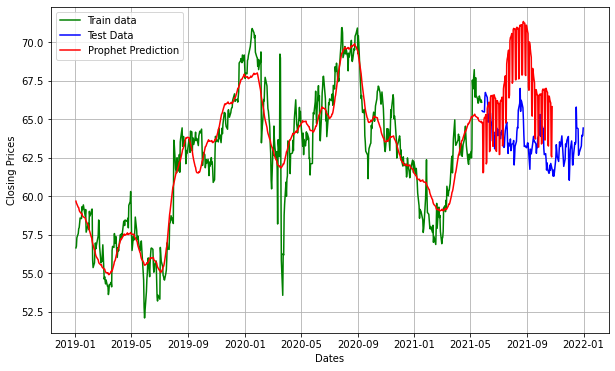

In [21]:
# Facebook Prophet Models
#plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(kellog_train_data, 'Green', label='Train data')
plt.plot(kellog_test_data, 'blue',  label='Test Data')
plt.plot(forecast['Prediction'], 'Red', label='Prophet Prediction')
plt.legend()


#Will need to update model so it predicts full test data


In [22]:
# Get Statistics for Prophet Predictions